<a href="https://colab.research.google.com/github/Jaysreebl/PRODIGY_DS_04/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

nltk.download('vader_lexicon')
twitter_data = pd.read_csv('Twitter.csv')

def preprocess_text(text):
    if isinstance(text, str):
        return text
    else:
        return ''
twitter_data['cleaned_content'] = twitter_data['content'].apply(preprocess_text)

# Initialize sentiment analyzer (Vader)
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis to each tweet
twitter_data['sentiment_score'] = twitter_data['cleaned_content'].apply(get_sentiment_scores)

# Categorize sentiments
def categorize_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

twitter_data['sentiment_category'] = twitter_data['sentiment_score'].apply(categorize_sentiment)



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


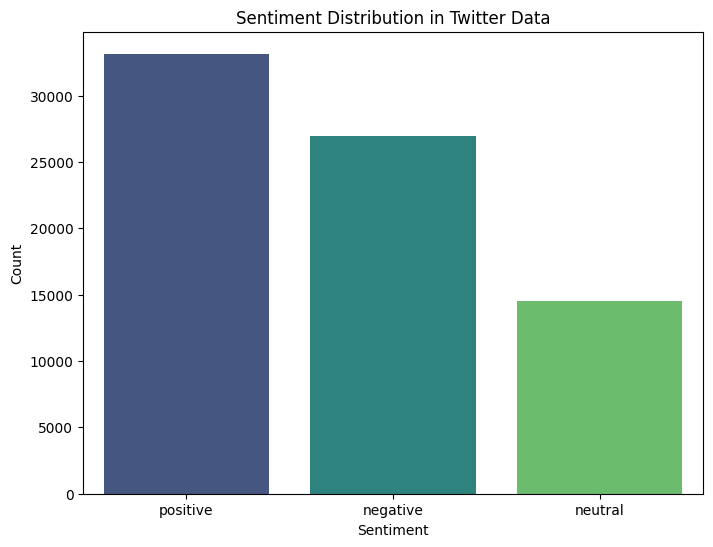

In [ ]:
sentiment_counts = twitter_data['sentiment_category'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, palette='viridis', legend=False)
plt.title('Sentiment Distribution in Twitter Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

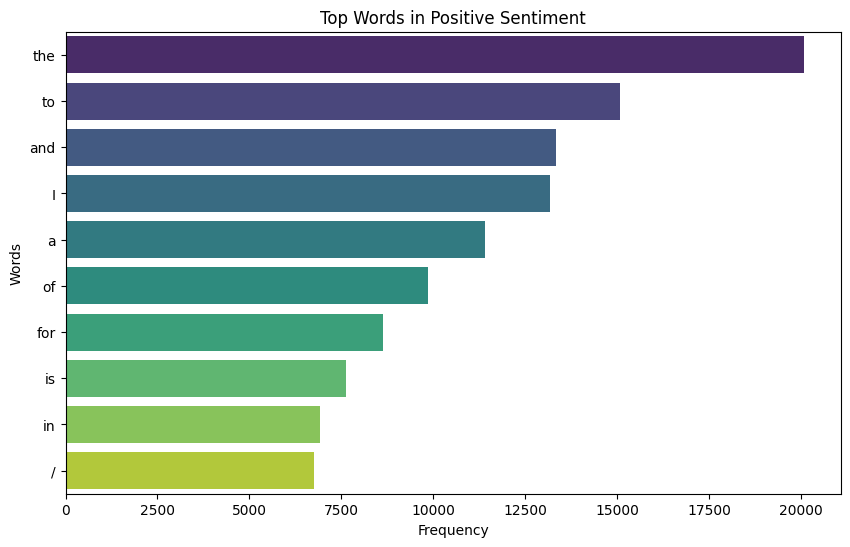

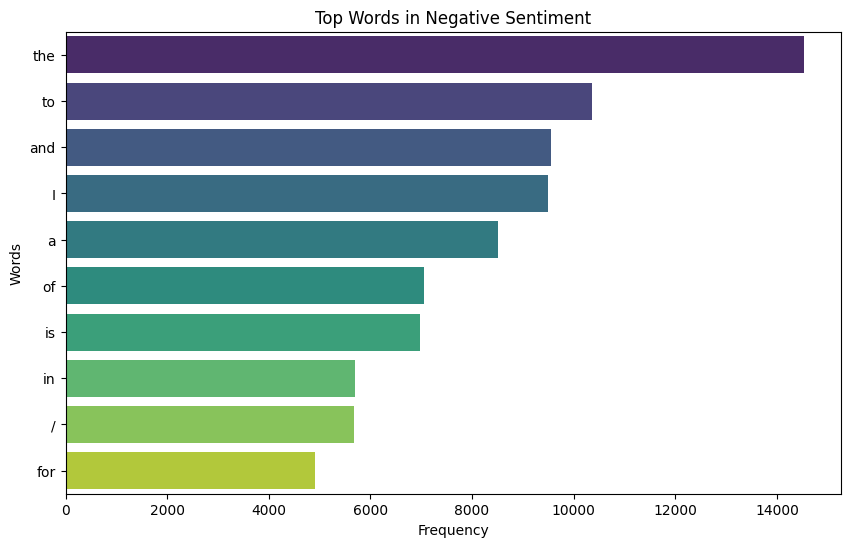

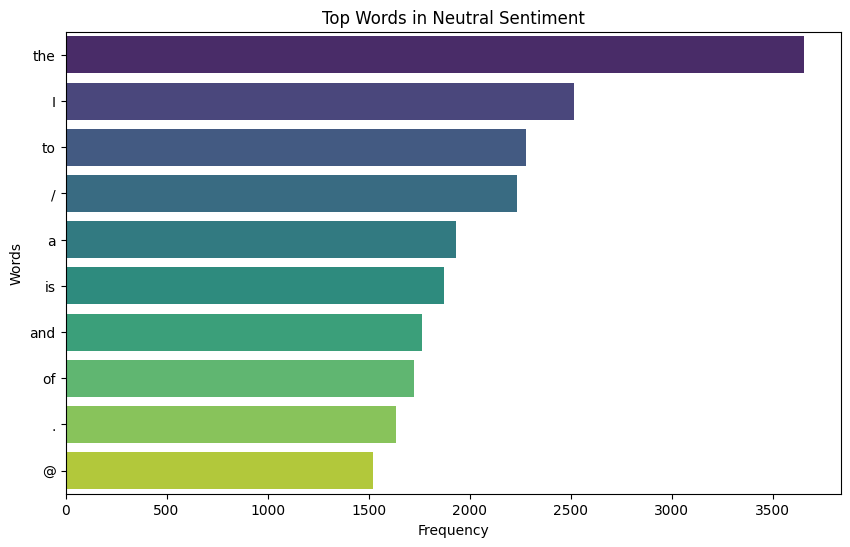

In [ ]:
# Function to get most frequent words
def get_most_common_words(texts, top_n=10):
    all_words = ' '.join(texts).split()
    word_counter = Counter(all_words)
    most_common_words = word_counter.most_common(top_n)
    return dict(most_common_words)
positive_tweets = twitter_data[twitter_data['sentiment_category'] == 'positive']['cleaned_content']
negative_tweets = twitter_data[twitter_data['sentiment_category'] == 'negative']['cleaned_content']
neutral_tweets = twitter_data[twitter_data['sentiment_category'] == 'neutral']['cleaned_content']

top_positive_words = get_most_common_words(positive_tweets)
top_negative_words = get_most_common_words(negative_tweets)
top_neutral_words = get_most_common_words(neutral_tweets)

# Visualize top words for each sentiment category using bar plots
def plot_top_words(words_dict, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(words_dict.values()), y=list(words_dict.keys()), hue=list(words_dict.keys()), palette='viridis', legend=False)
    plt.title(title)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

plot_top_words(top_positive_words, 'Top Words in Positive Sentiment')
plot_top_words(top_negative_words, 'Top Words in Negative Sentiment')
plot_top_words(top_neutral_words, 'Top Words in Neutral Sentiment')